---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [10]:
def answer_one():
    
    # Your code here
    data = pd.read_csv("fraud_data.csv")
    per = (data["Class"].value_counts()[1])/(data["Class"].value_counts()[1] + data["Class"].value_counts()[0])
    
    
    return per # Return your answer


In [12]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [15]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score,accuracy_score
    
    # Your code here
    dummy = DummyClassifier(strategy="most_frequent").fit(X_train,y_train)
    y_pred = dummy.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return (accuracy,recall)   # Return your answer

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [17]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score,accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return (accuracy,recall,precision)    # Return your answer

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [28]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C=1e9,gamma=1e-07)
    svm.fit(X_train,y_train)
    y_pred = svm.decision_function(X_test)> -220 
    confusion = confusion_matrix(y_test,y_pred)
    return confusion # Return your answer

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


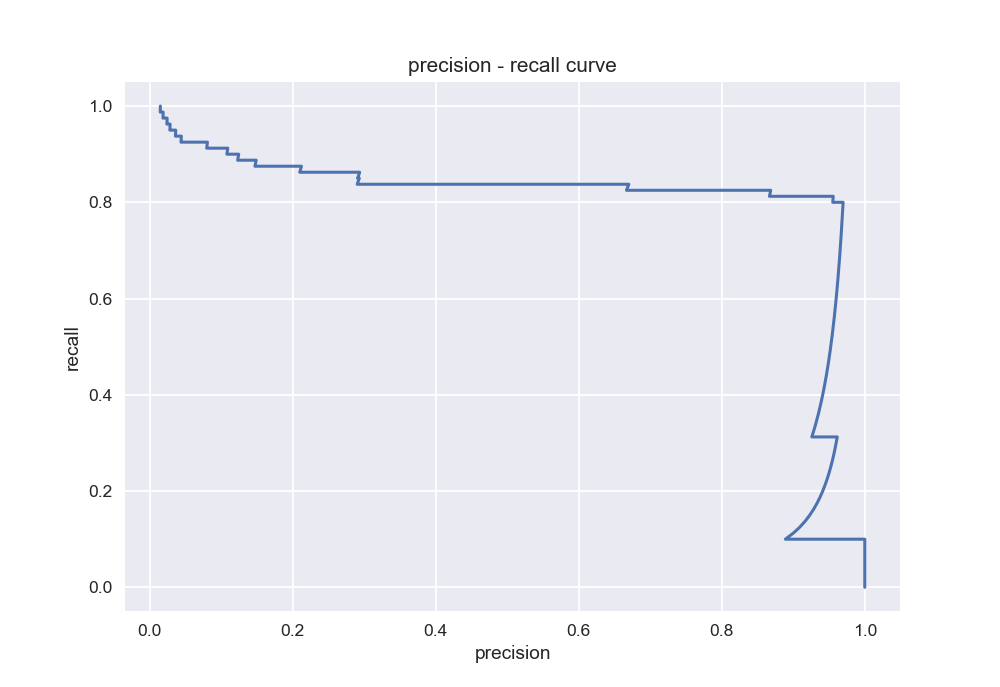

C:\Users\Saurabh kr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
                           # plotting precision recall curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve , roc_curve
import matplotlib.pyplot as plt


%matplotlib notebook
plt.style.use("seaborn")
plt.figure()
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.decision_function(X_test)
precision,recall,thresholds = precision_recall_curve(y_test,y_pred_lr)
plt.title("precision - recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.plot(precision,recall)


<IPython.core.display.Javascript object>


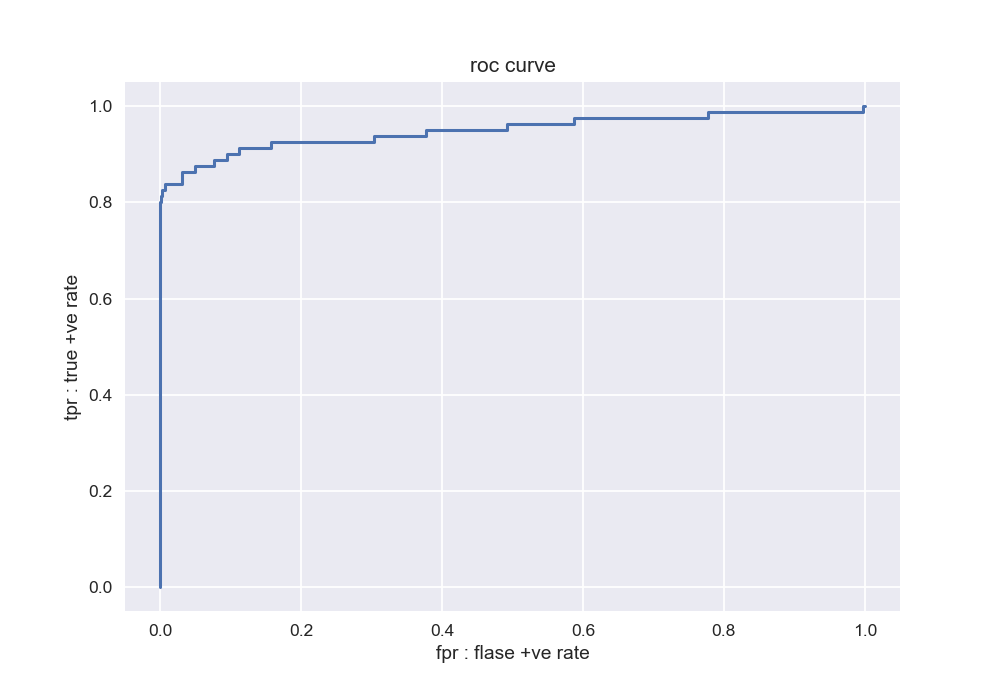

In [74]:
                               # roc curve

fpr_lr,tpr_lr,_ = roc_curve(y_test,y_pred_lr)
plt.figure()
plt.title("roc curve")
plt.xlabel("fpr : flase +ve rate")
plt.ylabel("tpr : true +ve rate")
plt.plot(fpr_lr,tpr_lr)

In [58]:
def answer_five():
        
    # Your code here
    
    # from the above two graphs
    
    return (0.83,0.94)# Return your answer

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [72]:
def answer_six():    
        
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    
    grid_values={'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    lr = LogisticRegression().fit(X_train,y_train)
    
    # Number of folds included as a parameter in GridSearchCV. Default cv=3.
    lr_custom = GridSearchCV(lr,param_grid=grid_values,scoring='recall',cv=3)
    lr_custom.fit(X_train,y_train)

    return np.array(lr_custom.cv_results_['mean_test_score'].reshape(5,2))

In [75]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())